In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [ ]:
def initialize_centroids(data, k):
    """Randomly initialize the centroids from the data points."""
    centroids_idx = np.random.choice(len(data), k, replace=False)
    centroids = data[centroids_idx]
    return centroids

In [ ]:
def compute_distances(data, centroids):
    """Compute the distances between each data point and centroids."""
    distances = np.sqrt(np.sum((data - centroids[:, np.newaxis])**2, axis=2))
    return distances

In [ ]:
def assign_clusters(distances):
    """Assign each data point to the closest centroid."""
    return np.argmin(distances, axis=0)

In [ ]:
def update_centroids(data, clusters, k):
    """Update the centroids by computing the mean of the points in each cluster."""
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[clusters == i]
        centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

In [ ]:
def k_means(data, k, max_iterations=100):
    """Implement the K-means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters

In [ ]:
k = 4
centroids, clusters = k_means(data_scaled, k)
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares:", wcss)

Total within-cluster sum of squares: 17.46619760906058


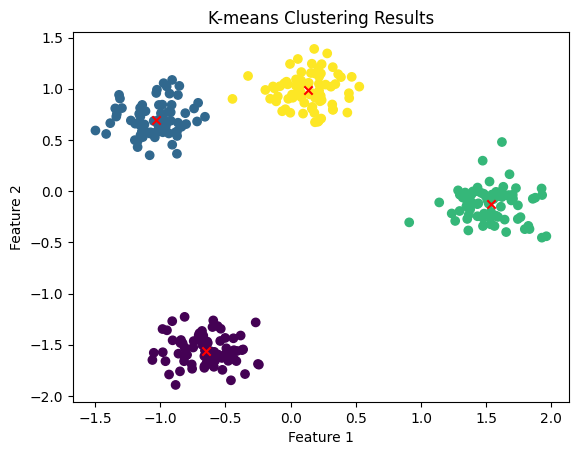

In [ ]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

In [ ]:
def initialize_medoids(data, k):
    """Randomly initialize the medoids from the data points."""
    medoids_idx = np.random.choice(len(data), k, replace=False)
    medoids = data[medoids_idx]
    return medoids

In [ ]:
def compute_dissimilarities(data, medoids):
    """Compute the dissimilarities between each data point and medoids."""
    dissimilarities = np.abs(data[:, np.newaxis] - medoids).sum(axis=2)
    return dissimilarities

In [ ]:
def assign_clusters(dissimilarities):
    """Assign each data point to the closest medoid."""
    return np.argmin(dissimilarities, axis=0)

In [ ]:
def update_medoids(data, clusters, k):
    """Update the medoids by selecting the data point with the minimum sum of dissimilarities in each cluster."""
    medoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[np.where(clusters == i)[0]]
        if len(cluster_points) > 0:
            dissimilarities = compute_dissimilarities(cluster_points, cluster_points)
            min_idx = np.argmin(np.sum(dissimilarities, axis=1))
            medoids[i] = cluster_points[min_idx]
    return medoids

In [ ]:
def k_medoids(data, k, max_iterations=100):
    """Implement the K-medoids clustering algorithm."""
    medoids = initialize_medoids(data, k)
    for iteration in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.all(medoids == new_medoids):
            print("Converged after", iteration + 1, "iterations.")
            break
        medoids = new_medoids
    else:
        print("Maximum iterations reached.")
    return medoids, clusters

In [ ]:
k = 4
medoids, clusters = k_medoids(data_scaled, k)

In [ ]:
non_empty_clusters = np.unique(clusters)
wcss = 0
for medoid_index in range(k):
    cluster_indices = np.where(clusters == medoid_index)[0]
    cluster_points = data_scaled[cluster_indices]
    if len(cluster_points) > 0:
        wcss_cluster = np.sum(np.sum(np.square(cluster_points - medoids[medoid_index]), axis=1))
        print(f"Within-cluster sum of squares for cluster {medoid_index}: {wcss_cluster}")
        wcss += wcss_cluster
print("Total within-cluster sum of squares:", wcss)

Converged after 2 iterations.
Total within-cluster sum of squares: 0


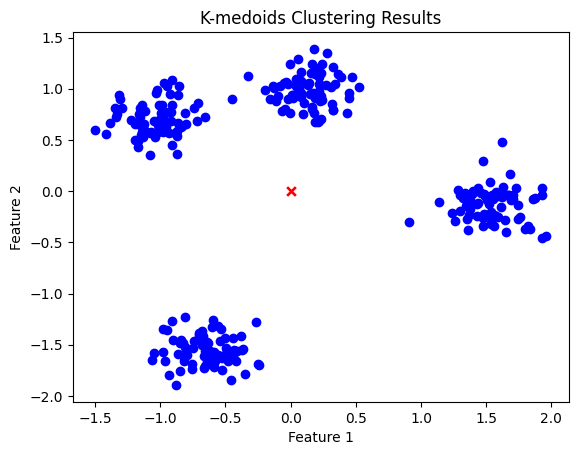

In [ ]:
clusters = clusters.astype(int)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c='blue', marker='o')
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoids Clustering Results')
plt.show()